In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in /opt/anaconda3/lib/python3.7/site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si

In [21]:
tick='TSLA'
start="2019-12-05"
end="2020-12-06"
df = yf.download(tick,start,end)

[*********************100%***********************]  1 of 1 completed


In [22]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-05,66.566002,66.884003,65.449997,66.073997,66.073997,18623000
2019-12-06,67.000000,67.772003,66.954002,67.178001,67.178001,38062000
2019-12-09,67.318001,68.889999,67.015999,67.905998,67.905998,45115500
2019-12-10,67.991997,70.146004,67.862000,69.767998,69.767998,44141500
2019-12-11,70.375999,71.438004,70.218002,70.540001,70.540001,34489000
...,...,...,...,...,...,...
2020-11-30,602.210022,607.799988,554.510010,567.599976,567.599976,63003100
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40382800
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700


In [23]:
df=df['Adj Close']
df.columns=[tick]
df.describe().round(2) #describe data 

count    253.00
mean     249.20
std      144.22
min       66.07
25%      130.19
50%      187.06
75%      406.02
max      599.04
Name: Adj Close, dtype: float64

In [24]:
Price = df[-1]
print('The spot price is', round(Price,2))

The spot price is 599.04


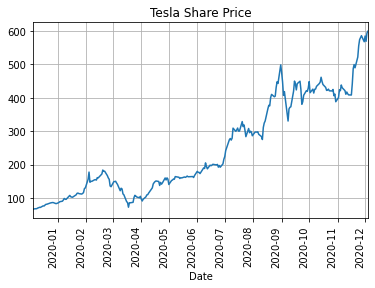

In [26]:
df.plot(label=tick)
plt.xlabel('Date')
plt.title('Tesla Share Price')
plt.xticks(rotation=90)
plt.grid()

In [29]:
ret=np.log(df/df.shift(1))
data=pd.concat([df,ret], axis=1)
data.columns=['Price', 'Return']
data.dropna(inplace=True)
data.tail()

,Price,Return
Date,,
2020-11-30,567.599976,-0.031493
2020-12-01,584.760010,0.029785
2020-12-02,568.820007,-0.027637
2020-12-03,593.380005,0.042271
2020-12-04,599.039978,0.009493


In [31]:
w=14
data['min'] = data['Price'].rolling(w).min()
data['max'] = data['Price'].rolling(w).max()
data['std'] = data['Price'].rolling(w).std()
data['mean'] = data['Price'].rolling(w).mean()
data['median'] = data['Price'].rolling(w).median()
data['ewma'] = data['Price'].ewm(halflife=0.5, min_periods=14).mean()
data.dropna().head()

,Price,Return,min,max,std,mean,median,ewma
Date,,,,,,,,
2019-12-26,86.188004,0.013292,67.178001,86.188004,6.505817,76.195857,76.049000,85.781465
2019-12-27,86.075996,-0.001300,67.905998,86.188004,6.451114,77.545714,77.465000,86.002363
2019-12-30,82.940002,-0.037113,69.767998,86.188004,5.955277,78.619571,79.718998,83.705593
2019-12-31,83.666000,0.008715,70.540001,86.188004,5.507816,79.612286,80.962997,83.675898
2020-01-02,86.052002,0.028119,71.678001,86.188004,5.086519,80.720286,82.028999,85.457976


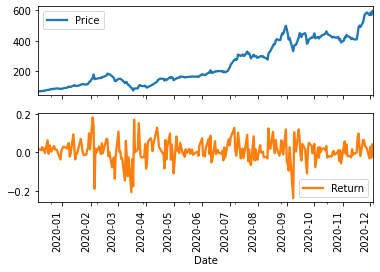

In [42]:
data[['Price','Return']].plot(subplots=True, lw=2.3)
plt.xticks(rotation=90)
plt.show()

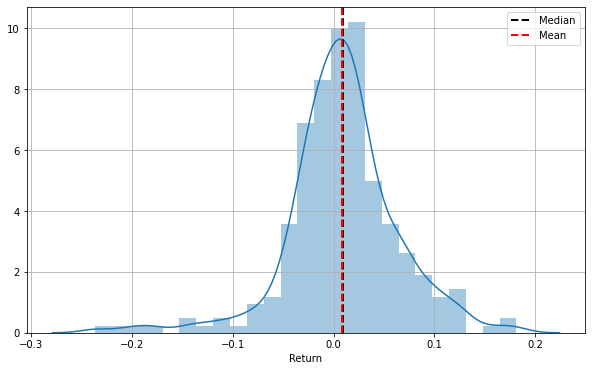

In [43]:
plt.figure(figsize=(10,6))
ax=sns.distplot(data['Return'])
ax.axvline(data['Return'].median(), color='black', ls='--', label='Median',lw=2)
ax.axvline(data['Return'].mean(), color='red', ls='--', label='Mean',lw=2)
plt.legend(loc=0)
plt.grid(True)

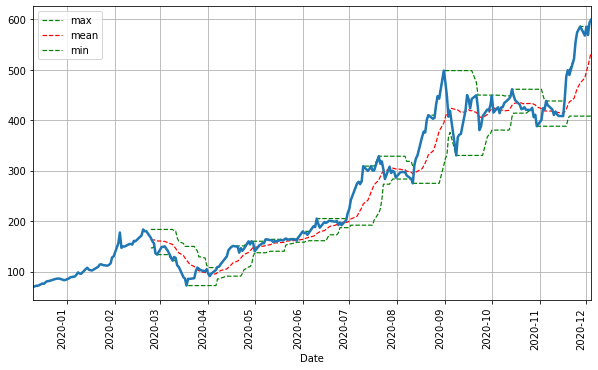

In [45]:
ax = data[['max', 'mean', 'min']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=1.2)
data['Price'].iloc[-250:].plot(ax=ax, lw=2.5);
plt.xticks(rotation=90)
palette=("Blues_d")
#sns.set_context("poster")
plt.grid(True)
plt.show()